In [5]:
#make_barplots_for_hypergeometric_test_results
#
#Fetch information from files, then make barplots

import pandas as pd
import seaborn as sns
import matplotlib as mpl 
import math
mpl.rcParams['pdf.fonttype'] = 42

In [7]:
data_dir = '../../../../analysis/statistics/gse/metabolomics'
compare_list = ['cVSneg','cVSpos']
condition_list = ['up','down']

result_df = pd.DataFrame(columns= ["data_type", "pathway","-logpvalue"])

for compare_type in compare_list:
    for condition in condition_list:
        data_type = '%s_%s' % (compare_type, condition)
        
        data_file = '%s/metabolomics.%s.%s.hypergeometric.result.tsv' % (data_dir, compare_type, condition)
        print (data_file)
        data_df = pd.read_csv(data_file, sep="\t")
        r, c = data_df.shape
        
        for i in range(r):
            pathway = data_df["pathway"][i]
            pval = float(data_df["pvalue"][i])
            if pval < 0.05:
                new_pval = -math.log(pval)
                result_df = result_df.append({"data_type": data_type, "pathway": pathway,"-logpvalue": new_pval}, ignore_index = True)
                
#             result_df.sort_values('pathway')
            
            

../../../../analysis/statistics/gse/metabolomics/metabolomics.cVSneg.up.hypergeometric.result.tsv
../../../../analysis/statistics/gse/metabolomics/metabolomics.cVSneg.down.hypergeometric.result.tsv
../../../../analysis/statistics/gse/metabolomics/metabolomics.cVSpos.up.hypergeometric.result.tsv
../../../../analysis/statistics/gse/metabolomics/metabolomics.cVSpos.down.hypergeometric.result.tsv


In [8]:
result_df = result_df.sort_values('pathway')
result_df

,data_type,pathway,-logpvalue
3,cVSneg_down,[Amino Acid] Urea cycle; Arginine and Proline ...,4.327538
9,cVSpos_down,[Amino Acid] Urea cycle; Arginine and Proline ...,4.556380
0,cVSneg_up,"[Carbohydrate] Glycolysis, Gluconeogenesis, an...",5.914504
4,cVSneg_down,[Lipid] Carnitine Metabolism,3.066155
6,cVSpos_up,[Lipid] Endocannabinoid,5.599422
5,cVSpos_up,[Lipid] Short Chain Fatty Acid,4.398156
2,cVSneg_up,[Lipid] Sphingolipid Synthesis,3.172469
8,cVSpos_up,[Lipid] Sphingolipid Synthesis,3.315938
1,cVSneg_up,[Lipid] Sphingosines,3.172469
7,cVSpos_up,[Lipid] Sphingosines,3.315938


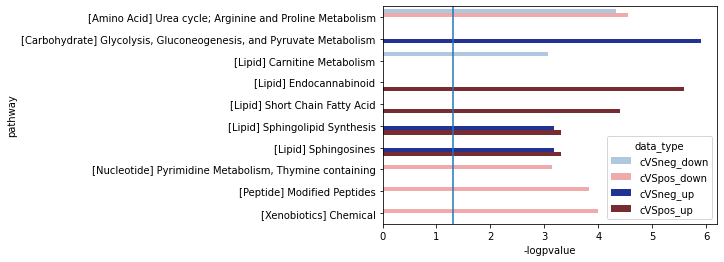

In [9]:
# my_palette = ['#1026a6','#A7C7E7','#841f27', '#FAA0A0']
my_palette = ['#A7C7E7', '#FAA0A0', '#1026a6','#841f27']
result_plot = sns.barplot(x="-logpvalue", y="pathway", hue="data_type", palette=my_palette, data=result_df)
result_plot.axvline(1.30103)
output_pdf = "../../../../analysis/statistics/gse/metabolomics/metabolomics.hypergeometric.results.pdf"

result_plot.figure.savefig(output_pdf)